# Ejercicios Prácticos

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)

Más información en: https://pycaret.org y https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression


# Instalación de Pycaret

In [1]:
import numpy as np 
import pandas as pd 


In [ ]:
!pip install pycaret

In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
# Importing Data from Local System
from google.colab import files

In [6]:
uploaded_train = files.upload()

Saving train.csv to train.csv


In [7]:
uploaded_test = files.upload()

Saving test.csv to test.csv


In [8]:
uploaded_sample = files.upload()

Saving sample_submission.csv to sample_submission.csv


# Regresión: Estimación del valor de la vivienda

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSYeyNpaoAW-3rFX9-ORmiJ-uLAAswYBRhszs2QzllV7MCfFPvk&usqp=CAU)

# Importa todo el paquete de regresión

In [3]:
## importa las librerias necesarias para este tipo de problema 
from pycaret.regression import *

# Analisis de los datos

In [9]:
""" Original code: 
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
sample= pd.read_csv('data/sample_submission.csv')
"""
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sample= pd.read_csv('sample_submission.csv')

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Set up del entorno (pre-procesamiento)

In [19]:
## Inicializa el entorno (reg) siendo el target SalePrice, imputando mendiante la media,
## con las variables categoricas: 
"""['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']"""
## ignorando las variables: ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities']
## y normalizando los datos
# silent = True For hiding some results in the output

reg = setup(data = train,
            target = 'SalePrice',
            numeric_imputation = 'mean',
            categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType'
                                  ,'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood'   
                                  ,'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl'    
                                  ,'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond'   
                                  ,'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir'   
                                  ,'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive'
                                  ,'SaleCondition'],
            ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
            normalize = True,
            silent = True)

,Description,Value
0,session_id,2729
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 384)"


# Entrenamiento y comparación de diferentes modelos

In [20]:
## entrena diferntes modelos y comparalos
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.494056e+04,6.101351e+08,2.408572e+04,8.966000e-01,0.1186,0.0858,6.234
lightgbm,Light Gradient Boosting Machine,1.635042e+04,6.859342e+08,2.574023e+04,8.859000e-01,0.1337,0.0965,0.209
rf,Random Forest Regressor,1.800077e+04,7.981579e+08,2.786892e+04,8.704000e-01,0.1511,0.1089,2.280
xgboost,Extreme Gradient Boosting,1.801076e+04,7.984388e+08,2.785078e+04,8.687000e-01,0.1456,0.1062,1.661
gbr,Gradient Boosting Regressor,1.664368e+04,7.608026e+08,2.664943e+04,8.651000e-01,0.1351,0.0985,0.716
huber,Huber Regressor,1.499819e+04,8.043687e+08,2.582614e+04,8.451000e-01,0.1231,0.0871,0.303
par,Passive Aggressive Regressor,1.555543e+04,8.493981e+08,2.690175e+04,8.405000e-01,0.1256,0.0902,0.917
et,Extra Trees Regressor,2.013896e+04,1.012385e+09,3.132307e+04,8.368000e-01,0.1679,0.1201,2.480
omp,Orthogonal Matching Pursuit,1.679877e+04,9.566683e+08,2.824113e+04,8.075000e-01,0.1399,0.0997,0.036
br,Bayesian Ridge,1.673001e+04,1.014435e+09,2.882244e+04,8.021000e-01,0.1388,0.0997,0.270


# Entrenamiento de CatBoost

In [22]:
## crea un modelo de catboost
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12742.0684,3.574613e+08,18906.6475,0.9102,0.1047,0.0781
1,16177.8441,5.829269e+08,24143.8787,0.9168,0.1222,0.0940
2,18887.8139,1.005540e+09,31710.2579,0.8781,0.1306,0.0959
3,15102.8807,4.479859e+08,21165.6782,0.9421,0.1199,0.0872
4,12268.1725,2.418332e+08,15550.9864,0.9565,0.0875,0.0729
5,14431.5549,6.828921e+08,26132.2047,0.9043,0.1194,0.0829
6,14415.0413,5.216710e+08,22840.1177,0.9207,0.1157,0.0854
7,16005.4036,1.221238e+09,34946.2191,0.6930,0.1467,0.0942
8,14256.9232,4.383283e+08,20936.2913,0.9201,0.1154,0.0835
9,15117.8804,6.014732e+08,24524.9505,0.9238,0.1234,0.0837


# Optimización del modelo

In [25]:
## optimiza el modelo de catboost
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16022.4996,4.987325e+08,22332.3194,0.8747,0.1273,0.0998
1,18220.1260,6.484436e+08,25464.5564,0.9074,0.1427,0.1116
2,19739.7057,1.140461e+09,33770.7129,0.8618,0.1520,0.1062
3,15511.9476,5.049003e+08,22469.9859,0.9348,0.1339,0.0946
4,13522.0086,2.894466e+08,17013.1317,0.9479,0.1057,0.0846
5,15067.1310,7.942236e+08,28181.9725,0.8887,0.1310,0.0876
6,16548.4904,7.560733e+08,27496.7864,0.8851,0.1363,0.0979
7,17667.1403,8.605032e+08,29334.3347,0.7837,0.1467,0.1043
8,15279.5643,5.080540e+08,22540.0533,0.9074,0.1420,0.0964
9,16477.3948,6.787143e+08,26052.1467,0.9140,0.1317,0.0913


# Interpretación del modelo

**interpret_model():** Genera un conjunto de gráficas destinadas a que se sepa cómo está trabajando y cómo está tomando decisiones el modelo.

In [ ]:
!pip install shap

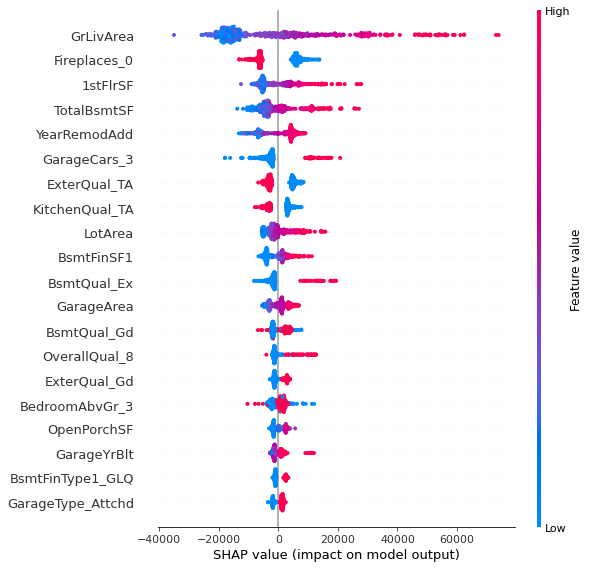

In [27]:
## interpreta el modelo optimizado de catboost
interpret_model(tuned_catboost)

De esto interpretamos que *GrLivArea* tiene que ser alto y que además, cuando es muy bajo, el precio también desciende mucho.

*BsmtQual_Ex* no afecta considerablemente el precio cuando es bajo, pero si aumenta mucho el precio cuando es alta esta variable.

Las demás conclusiones son similares.

In [29]:
## haz las predicciones con los datos de test
predictions = predict_model(tuned_catboost , data = test)

In [30]:
predictions

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,121548.142459
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,159367.081327
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,186386.242018
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,185439.465280
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,182007.332673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,94320.837580
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,96942.401763
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,154782.240004
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2